In [1]:
import xsimlab as xs

In [2]:
@xs.process
class A:
    b_v = xs.global_ref('b_v', seemingly_cyclic=True)
    a_v = xs.variable(intent='out')
    
    @xs.runtime(args='step')
    def run_step(self, step):
        self.a_v = self.b_v + step
        
@xs.process
class B:
    a_v = xs.foreign(A, 'a_v')
    b_v = xs.variable(intent='out', global_name='b_v')
    
    def initialize(self):
        self.b_v = 1
    
    @xs.runtime(args='step')
    def run_step(self, step):
        self.b_v = self.a_v + 10

In [3]:
model = xs.Model({
    'a': A,
    'b': B
})

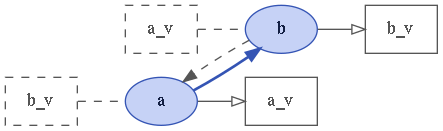

In [4]:
model.visualize(show_variables=True)

In [5]:
ds = xs.create_setup(
    model,
    clocks={'t': range(10)},
    output_vars={
        'a__a_v':'t',
        'b__b_v':'t'
    }
)

In [6]:
ds.xsimlab.run(model)

<xarray.Dataset>
Dimensions:  (t: 10)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    a__a_v   (t) float64 1.0 12.0 24.0 37.0 51.0 66.0 82.0 99.0 117.0 117.0
    b__b_v   (t) float64 11.0 22.0 34.0 47.0 61.0 76.0 92.0 109.0 127.0 127.0